In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-signs-dataset-in-yolo-format/yolov3_ts_train.cfg
/kaggle/input/traffic-signs-dataset-in-yolo-format/getting-full-path.py
/kaggle/input/traffic-signs-dataset-in-yolo-format/test.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts_data.data
/kaggle/input/traffic-signs-dataset-in-yolo-format/train.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4
/kaggle/input/traffic-signs-dataset-in-yolo-format/classes.names
/kaggle/input/traffic-signs-dataset-in-yolo-format/yolov3_ts_test.cfg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00266.jpg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00286.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00080.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00440.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00822.jpg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00733.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00

In [2]:
# Install Essential Libraries
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/ad/1e/62ed77dbb887a963c788c61dc6e740c1d16462fcdd37acf247099f1a911b/ultralytics-8.0.229-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 12.5 MB/s eta 0:00:00a 0:00:01


In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 展示数据集部分图像

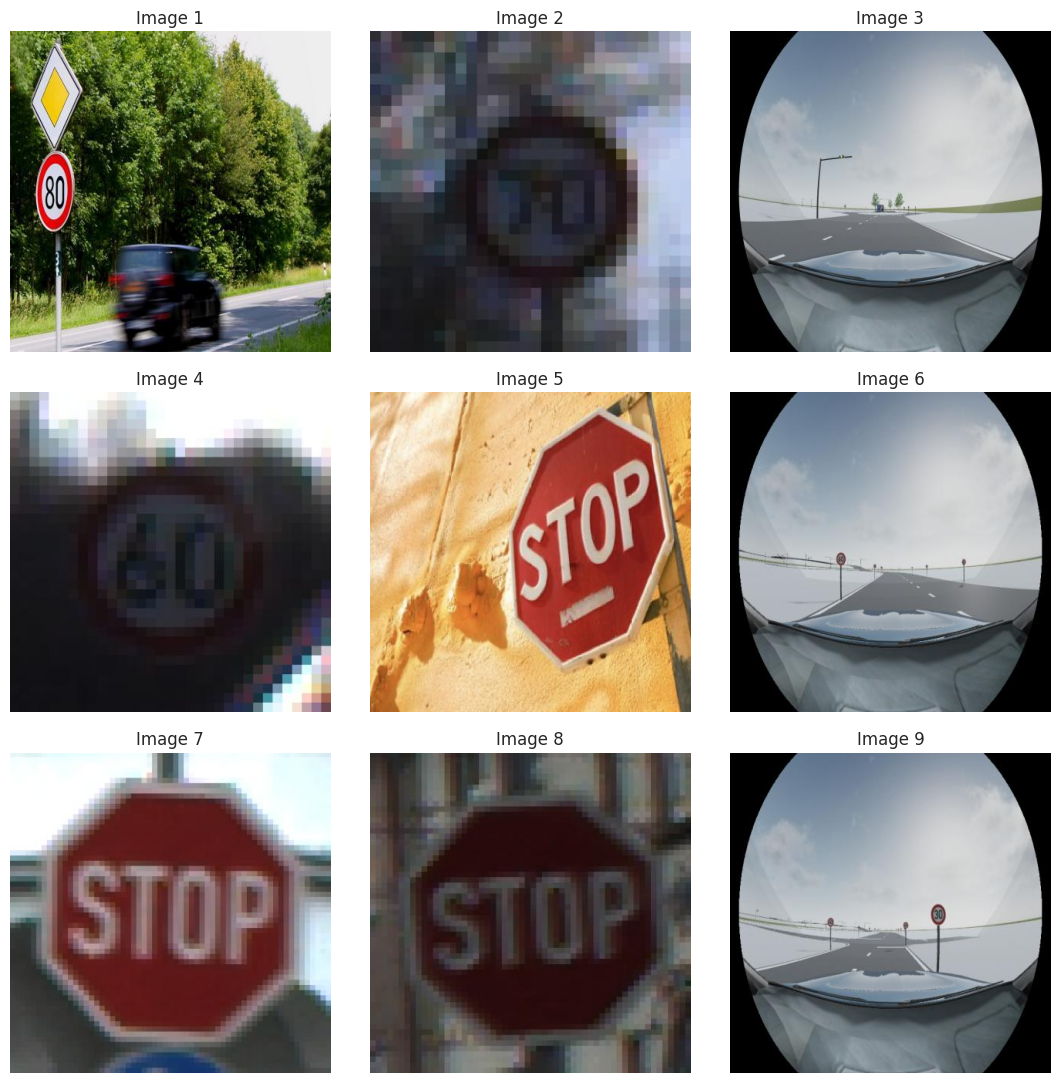

In [4]:
Image_dir = '/kaggle/input/cardetection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# 随机展示数据集部分图像
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# 获取图像的大小
image = cv2.imread("/kaggle/input/cardetection/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 22.7MB/s]



image 1/1 /kaggle/input/cardetection/train/images/00000_00002_00028_png.rf.cf9d9a34646bf5cbef7d684ee1af1d08.jpg: 416x416 (no detections), 6.6ms
Speed: 6.3ms preprocess, 6.6ms inference, 15.7ms postprocess per image at shape (1, 3, 416, 416)


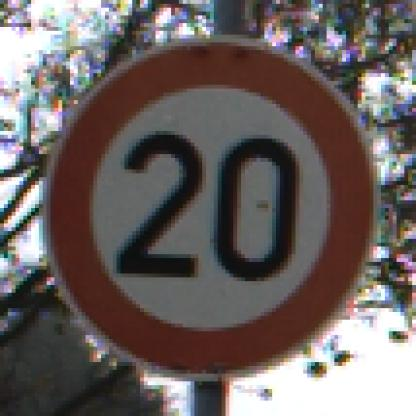

In [6]:
# 使用预训练的 YOLOv8n 模型
model = YOLO("yolov8n.pt") 

# 使用模型检测对象
image = "/kaggle/input/cardetection/train/images/00000_00002_00028_png.rf.cf9d9a34646bf5cbef7d684ee1af1d08.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# 显示结果
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
!pip install -U ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.9 from https://files.pythonhosted.org/packages/29/03/107d96077c4befed191f7ad1a12c7b52a8f9d2778a5836d59f9855c105f6/widgetsnbextension-4.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.9 from https://files.pythonhosted.org/packages/e8/05/0ebab152288693b5ec7b339aab857362947031143b282853b4c2dd4b5b40/jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.7 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbex

## 模型微调

In [9]:
# 定义超参数网格
batch_sizes = [8, 16, 32, 64]
learning_rates = [0.001, 0.0003, 0.0001]
dropouts = [0.15, 0.25]
optimizers = ['adam', 'sgd', 'auto']

In [10]:
# 选择超参组合
best_performance = 0
best_hyperparameters = None

for batch_size in batch_sizes:
    for lr in learning_rates:
        for dropout in dropouts:
            for optimizer in optimizers:
                # Train the model with current hyperparameters
                model = YOLO('yolov8n.yaml').load('yolov8n.pt')
                result = model.train(data="/kaggle/input/cardetection/data.yaml", epochs=10, imgsz=416, batch=batch_size, lr0=lr, dropout=dropout, device="0")

                # Evaluate the model
                metrics = model.val(split='test')

                # Track the best hyperparameters
                if metrics.results_dict["metrics/mAP50(B)"] > best_performance:
                    best_performance = metrics.results_dict["metrics/mAP50(B)"]
                    best_hyperparameters = {'batch_size': batch_size, 'lr': lr, 'dropout': dropout, 'optimizer': optimizer}

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 755k/755k [00:00<00:00, 4.00MB/s]
2023-12-26 09:07:37,064	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-26 09:07:37,606	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:17<00:00, 206.81it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 223.98it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.617G     0.9123      4.137      1.151          7        416:  24%|██▍       | 107/442 [00:12<00:39,  8.50it/s]


KeyboardInterrupt: 

In [ ]:
# 超参选择过程太漫长了，结果记录如下： imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15，迭代epochs=100

## 使用最佳超参数训练最终模型

In [11]:
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# 训练最终模型
# final_result = final_model.train(data="/kaggle/input/cardetection/data.yaml", epochs=100, imgsz=416, batch=best_hyperparameters['batch_size'], lr0=best_hyperparameters['lr'], dropout=best_hyperparameters['dropout'], device="0")
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = "0")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 1021.89it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 803.55it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.77G     0.8518       3.51      1.099         27        416: 100%|██████████| 56/56 [00:19<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        801        944     0.0582        0.8       0.14      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.62G     0.7141       2.32      1.014         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.323      0.446        0.3      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.62G     0.7273      1.929      1.003         25        416: 100%|██████████| 56/56 [00:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


                   all        801        944      0.377      0.427      0.373      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.63G     0.7226      1.686     0.9995         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        801        944      0.585      0.536      0.583      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.63G     0.6729      1.458     0.9782         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.563      0.635      0.621      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.62G     0.6633      1.302     0.9674         34        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.761      0.638      0.726      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.62G       0.65      1.198     0.9637         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.759      0.697      0.763      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.63G     0.6541      1.142     0.9684         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944       0.81      0.634      0.728      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.62G     0.6385      1.077      0.959         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.832      0.746       0.82      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.62G     0.6296      1.006     0.9508         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944      0.788      0.699      0.771      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.62G     0.6259     0.9773     0.9556         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.841      0.754      0.841      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.62G     0.6205     0.9491     0.9487         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.867      0.755      0.839      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.62G     0.6236     0.9078      0.948         35        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.906      0.772       0.86      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.62G     0.6021      0.861     0.9426         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        801        944      0.898        0.8      0.864      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.62G        0.6     0.8394     0.9433         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.896      0.757      0.846      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.62G     0.6017     0.8174     0.9439         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.909      0.784      0.872      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.62G     0.5939     0.7882     0.9419         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


                   all        801        944      0.913      0.813      0.882      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.62G     0.5941     0.7906     0.9367         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.889      0.773      0.862      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.62G     0.5801     0.7674     0.9369         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944      0.914      0.827      0.895      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.63G     0.5919     0.7724     0.9404         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.915      0.793      0.872      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.62G     0.5953     0.7582     0.9354         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944       0.94       0.82      0.901      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.62G     0.5697     0.7098     0.9345         17        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.933      0.822      0.892      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.63G     0.5759     0.7357     0.9376         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.927      0.826      0.891      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.62G     0.5698     0.6994     0.9276         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        801        944        0.9      0.814      0.882      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.62G     0.5651     0.6995     0.9287         33        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        801        944      0.915      0.825      0.894      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.63G     0.5616     0.6922     0.9251         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.894      0.827      0.882      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.62G     0.5635     0.6875     0.9322         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.919      0.841      0.901      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.62G     0.5724     0.6717     0.9311         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        801        944      0.949      0.815      0.902      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.62G     0.5644     0.6548     0.9266         25        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.915      0.843      0.904      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.62G     0.5506     0.6529     0.9277         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.946      0.831      0.899      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.62G     0.5513     0.6517     0.9249         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944      0.927      0.818      0.901       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.62G     0.5526     0.6443     0.9273         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.909       0.85      0.906      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.62G     0.5522     0.6379     0.9214         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.919      0.841       0.91      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.62G     0.5521     0.6273     0.9223         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


                   all        801        944       0.93      0.845      0.913      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.62G     0.5347     0.6066     0.9225         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.917      0.838      0.904      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.62G     0.5402     0.6198     0.9186         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.943      0.822      0.903      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.62G     0.5368     0.6174     0.9215         12        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        801        944       0.95      0.833       0.91      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.62G      0.544      0.602       0.92         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.934      0.848      0.909      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.62G     0.5335     0.5912     0.9165         13        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.955      0.852      0.918      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.62G     0.5364     0.6109      0.921         12        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944       0.96      0.835      0.915      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.62G     0.5374     0.5896     0.9207         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        801        944      0.954      0.836      0.916      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.62G     0.5234     0.5682     0.9105         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.943      0.824       0.91      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.62G     0.5283     0.5872     0.9164         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.931      0.854       0.92      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.62G      0.526     0.5804     0.9211         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        801        944      0.948      0.838       0.92      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.62G     0.5194     0.5715     0.9153         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        801        944      0.945      0.859      0.923      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.62G     0.5252     0.5744     0.9164         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.934      0.842      0.914       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.62G     0.5238     0.5751      0.914         17        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944      0.931      0.871      0.922      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.62G     0.5175     0.5481     0.9132         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.949      0.861      0.923      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.62G     0.5246      0.552     0.9143         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.938      0.861       0.92      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.62G     0.5169     0.5517     0.9145         17        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.949      0.866      0.921      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.62G     0.5131     0.5407     0.9139         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.913      0.876      0.922      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.62G     0.5109      0.539     0.9147         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.962      0.847      0.924      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.62G     0.5123     0.5327     0.9119         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944       0.94      0.863      0.922      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.63G      0.498     0.5264     0.9085         29        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944       0.93      0.872      0.922      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.62G      0.496     0.5293       0.91         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.924      0.876      0.925      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.62G     0.5089     0.5323      0.912         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.937      0.875      0.926      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.63G     0.5085     0.5217     0.9097         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        801        944      0.949      0.869      0.925      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.62G     0.5106     0.5276     0.9106         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.968      0.852      0.929      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.62G     0.4982     0.5101     0.9088         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        801        944      0.928      0.883      0.931      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.62G     0.4978     0.5066     0.9106         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944       0.95      0.864      0.929      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.62G     0.4891     0.4936     0.9088         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.956       0.86       0.93      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.62G     0.4944     0.5008     0.9083         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.957      0.868      0.929      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.62G     0.4913     0.4867     0.9051         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.962      0.851      0.929       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.62G     0.5036     0.5009      0.906         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.944      0.867      0.935      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.63G     0.4867     0.4959     0.9062         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.955      0.859      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.62G     0.4916      0.502     0.9084         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.922      0.901      0.937      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.62G     0.4942     0.4917     0.9041         24        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.937      0.888      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.63G      0.483     0.4881     0.9055         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.951      0.885      0.938      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.63G     0.4886      0.488     0.9054         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.955      0.869      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.62G     0.4852     0.4785     0.9047         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.952      0.866      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.63G     0.4841     0.4707     0.9025         21        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.951      0.881      0.935      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.62G     0.4688     0.4557     0.8997         28        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.924      0.898      0.934      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.62G     0.4732     0.4524      0.901         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.934      0.892      0.934      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.63G     0.4684     0.4603     0.8981         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        801        944      0.929      0.897      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.62G     0.4734     0.4601     0.9031         18        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.938      0.867      0.932      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.62G     0.4758      0.452     0.9031         14        416: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.938       0.88      0.935      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.62G     0.4745     0.4547     0.9028         31        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.945      0.869      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.62G     0.4714     0.4521     0.9008         32        416: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        801        944      0.944       0.89      0.932      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.62G     0.4656     0.4501     0.8981         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.937      0.886      0.936      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.62G     0.4691     0.4462     0.9011         15        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.924      0.896      0.932       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.62G      0.466     0.4429     0.8969         20        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        801        944      0.921      0.892      0.932      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.62G     0.4585     0.4374     0.8995         29        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.938      0.897      0.937      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.62G     0.4583     0.4345     0.8948         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.944      0.896      0.941      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.62G     0.4667     0.4302     0.8977         22        416: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.941      0.887      0.943      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.62G      0.456     0.4248     0.8952         28        416: 100%|██████████| 56/56 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        801        944      0.931      0.885      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.62G     0.4546     0.4269      0.893         27        416: 100%|██████████| 56/56 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.941      0.875      0.936      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.62G     0.4504     0.4236     0.8955         23        416: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.936      0.887      0.936      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.62G     0.4601     0.4325     0.8979         19        416: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        801        944      0.942      0.892      0.937      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.63G     0.4483     0.4143     0.8945         28        416: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944       0.95      0.884      0.939      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.62G      0.446     0.4034     0.8922         33        416: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.958      0.881      0.941      0.821


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.62G     0.4515     0.2762     0.8438         12        416: 100%|██████████| 56/56 [00:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944       0.93      0.896      0.938       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.62G      0.437     0.2697     0.8458         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        801        944      0.946      0.879      0.936      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.62G     0.4461      0.271     0.8437         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        801        944      0.955      0.887      0.941      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.62G     0.4368     0.2632     0.8468         11        416: 100%|██████████| 56/56 [00:16<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        801        944      0.949      0.886      0.941      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.62G     0.4332     0.2582     0.8377         10        416: 100%|██████████| 56/56 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        801        944      0.946      0.893      0.941      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.62G     0.4331     0.2585     0.8414         14        416: 100%|██████████| 56/56 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        801        944      0.933      0.907      0.942      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.62G     0.4293     0.2556     0.8365         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        801        944      0.939      0.901      0.942      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.62G     0.4267     0.2588     0.8424         10        416: 100%|██████████| 56/56 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        801        944      0.936      0.903      0.941      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.62G     0.4214     0.2507     0.8356         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        801        944      0.942      0.896       0.94      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.62G     0.4188     0.2498     0.8407         10        416: 100%|██████████| 56/56 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        801        944      0.941      0.898       0.94      0.824



100 epochs completed in 0.625 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


                   all        801        944      0.941      0.887      0.943      0.825
           Green Light        801        122      0.876      0.636      0.782       0.48
             Red Light        801        108      0.833        0.6      0.744       0.45
       Speed Limit 100        801         52      0.917      0.942      0.987      0.894
       Speed Limit 110        801         17       0.84          1       0.99      0.922
       Speed Limit 120        801         60      0.947      0.983      0.993      0.919
        Speed Limit 20        801         56      0.992      0.964      0.994      0.884
        Speed Limit 30        801         74      0.986      0.945      0.987      0.932
        Speed Limit 40        801         55      0.982       0.98      0.993      0.891
        Speed Limit 50        801         71          1      0.865      0.956      0.854
        Speed Limit 60        801         76      0.933      0.921       0.95      0.874
        Speed Limit 7

## 训练结果展示

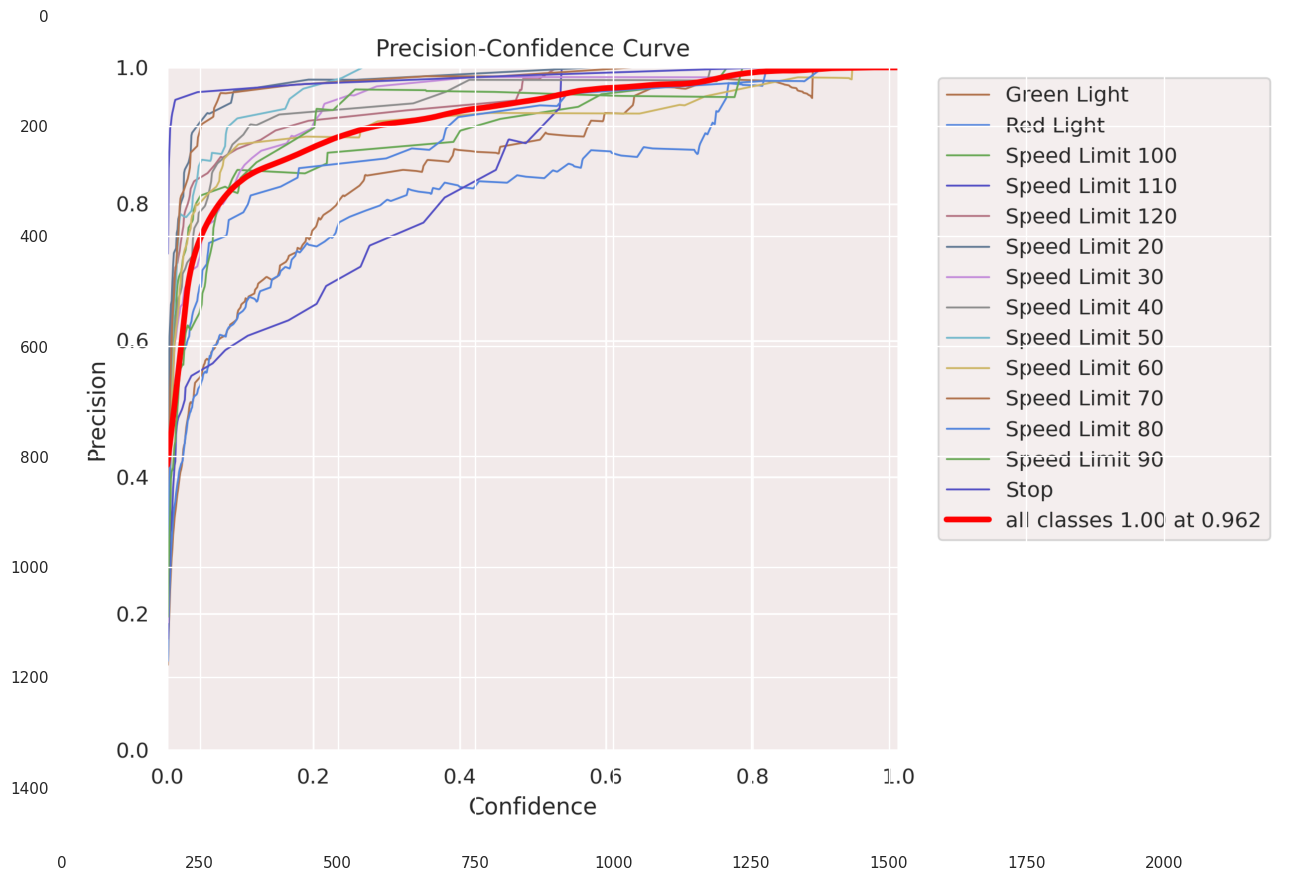

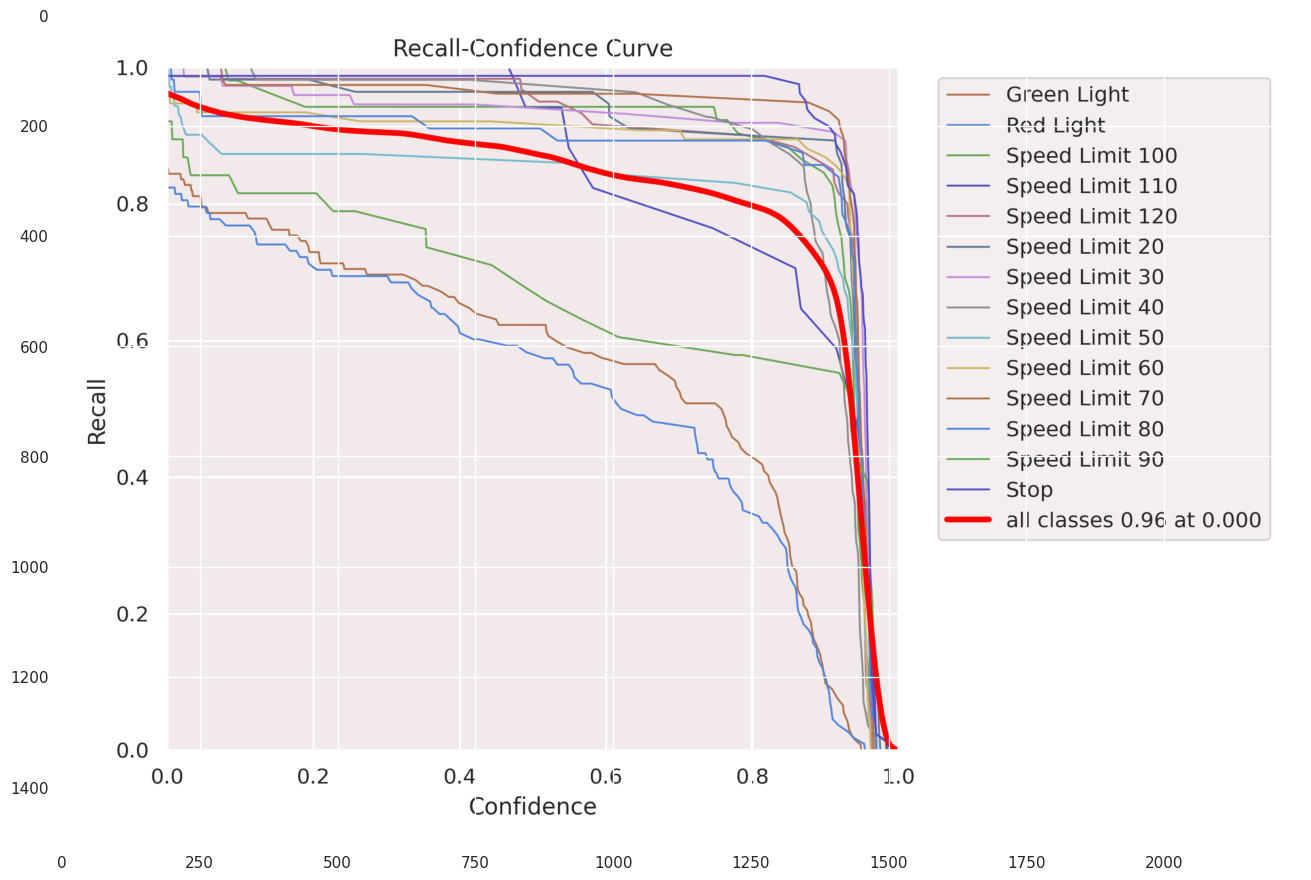

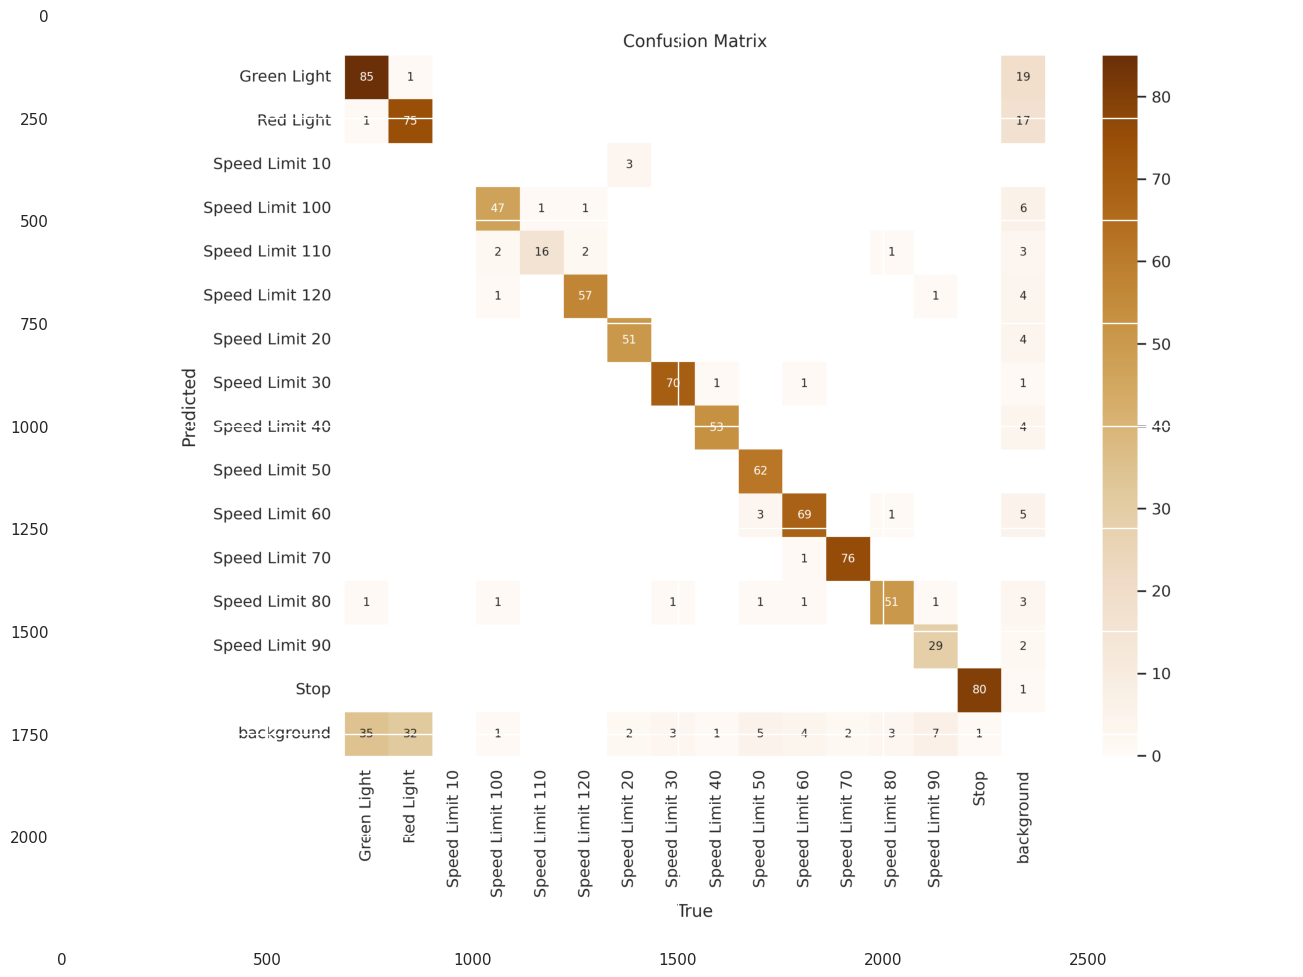

In [13]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train2/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [14]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train2/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
90                       91                  0.45151                  0.27620   
91                       92                  0.43698                  0.26973   
92                       93                  0.44612                  0.27098   
93                       94                  0.43675                  0.26320   
94                       95                  0.43322                  0.25822   
95                       96                  0.43313                  0.25851   
96                       97                  0.42927                  0.25565   
97                       98                  0.42667                  0.25880   
98                       99                  0.42140                  0.25068   
99                      100                  0.41881                  0.24981   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
90                  0.84381                  0.92978                  0.89598   
91                  0.84583                  0.94577                  0.87855   
92                  0.84369                  0.95541                  0.88660   
93                  0.84681                  0.94935                  0.88552   
94                  0.83774                  0.94615                  0.89319   
95                  0.84135                  0.93330                  0.90657   
96                  0.83648                  0.93865                  0.90120   
97                  0.84240                  0.93627                  0.90254   
98                  0.83558                  0.94151                  0.89638   
99                  0.84067                  0.94050                  0.89781   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
90                  0.93801                  0.81966                  0.50807   
91                  0.93608                  0.81783                  0.50770   
92                  0.94081                  0.82263                  0.50758   
93                  0.94128                  0.82250                  0.50443   
94                  0.94064                  0.82318                  0.50728   
95                  0.94167                  0.82394                  0.50426   
96                  0.94199                  0.82479                  0.50478   
97                  0.94121                  0.82143                  0.50798   
98                  0.94027                  0.82159                  0.50594   
99                  0.94005                  0.82423                  0.50477   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
90                  0.29784                  0.86404                 0.000063   
91                  0.29859                  0.86479                 0.000057   
92                  0.29240                  0.86665                 0.000052   
93                  0.29235                  0.86445                 0.000047   
94                  0.28690                  0.86627                 0.000042   
95                  0.28942                  0.86365                 0.000037   
96                  0.28990                  0.86691                 0.000031   
97                  0.28991                  0.86652                 0.000026   
98                  0.29004                  0.86591                 0.000021   
99                  0.28810                  0.86604                 0.000016   

                     lr/pg1                   lr/pg2  
90                 0.000063                 0.000063  
91                 0.000057                 0.000057  
92                 0.000052                 0.000052  
93                 0.000047                 0.000047  
94                 0.000042                 0.000042  
95                 0.000037                 0.000037  
96                 0.000031                 0.000031  
97            

In [15]:
import pandas as pd
df = pd.DataFrame(Result_Final_model)
df.head()

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.85175                   3.5103   
1                        2                  0.71408                   2.3204   
2                        3                  0.72732                   1.9294   
3                        4                  0.72259                   1.6865   
4                        5                  0.67293                   1.4576   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.09860                  0.05818                  0.80045   
1                  1.01450                  0.32281                  0.44568   
2                  1.00290                  0.37749                  0.42655   
3                  0.99946                  0.58528                  0.53630   
4                  0.97818                  0.56315                  0.63537   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.13975                  0.11860                  0.70970   
1                  0.30008                  0.25518                  0.69529   
2                  0.37296                  0.30229                  0.74643   
3                  0.58296                  0.46709                  0.72969   
4                  0.62135                  0.51192                  0.68558   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   3.1545                  0.96153                 0.000172   
1                   2.1812                  0.96331                 0.000344   
2                   2.0614                  1.00690                 0.000513   
3                   1.9710                  0.99797                 0.000510   
4                   1.5926                  0.95572                 0.000510   

                    lr/pg1                   lr/pg2  
0                 0.000172                 0.000172  
1                 0.000344                 0.000344  
2                 0.000513                 0.000513  
3                 0.000510                 0.000510  
4                 0.000510                 0.000510

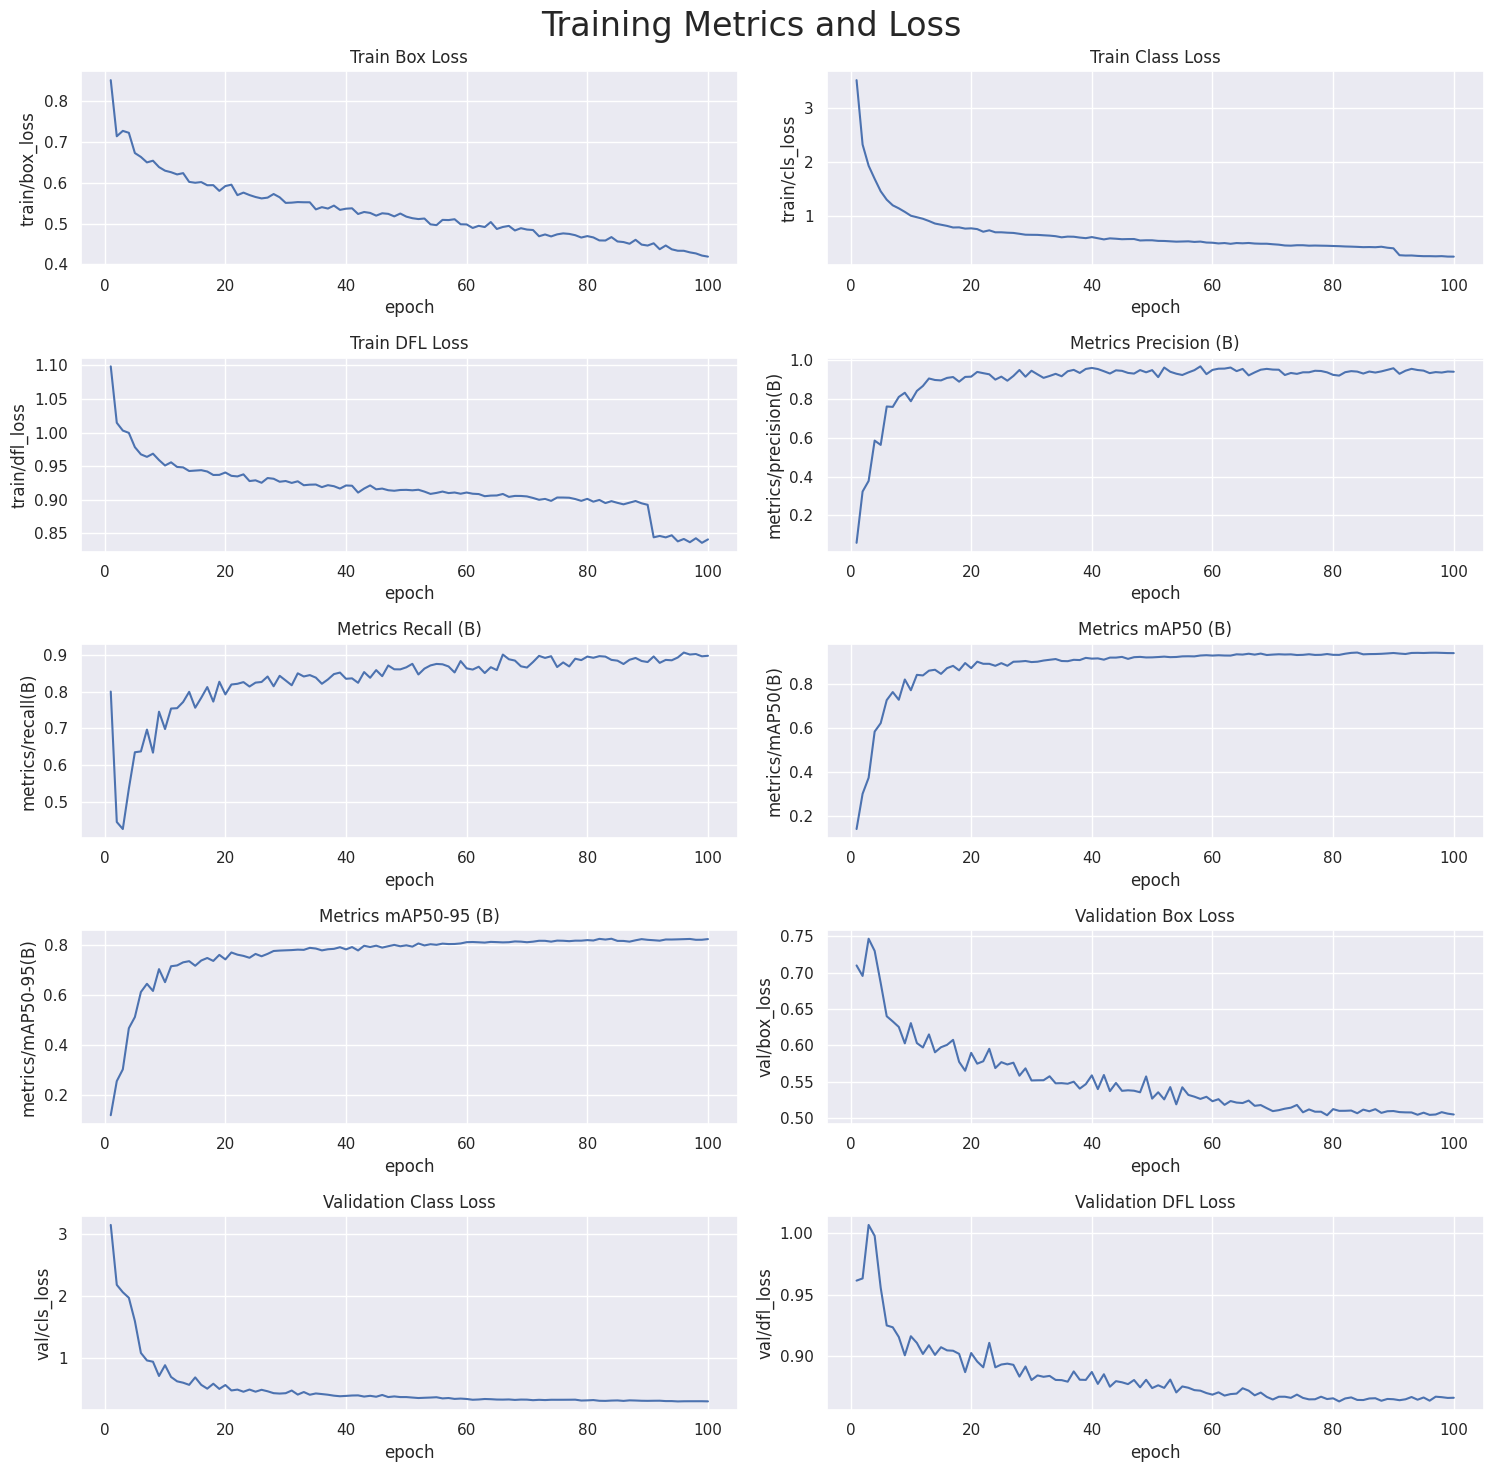

In [16]:
df.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


## 在验证集上评估模型

In [17]:
# 加载性能最佳的模型
Valid_model = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

# 在验证集上评估模型
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:03<00:00, 184.56it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:05<00:00,  7.33it/s]


                   all        638        770       0.92      0.884      0.932      0.801
           Green Light        638        110      0.936      0.764       0.88      0.542
             Red Light        638         94      0.824      0.606      0.713      0.447
        Speed Limit 10        638          3      0.572          1      0.863      0.653
       Speed Limit 100        638         46      0.956      0.913      0.982       0.87
       Speed Limit 110        638         21      0.943       0.81       0.88       0.76
       Speed Limit 120        638         44      0.941          1      0.977      0.888
        Speed Limit 20        638         46      0.963      0.935      0.986      0.916
        Speed Limit 30        638         60      0.963      0.875      0.946       0.88
        Speed Limit 40        638         53      0.985      0.962      0.987      0.884
        Speed Limit 50        638         50      0.955      0.856      0.924      0.843
        Speed Limit 6

In [18]:
# 最终结果
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9204714334880675
metrics/recall(B):  0.8835838321158678
metrics/mAP50(B):  0.9318136516313607
metrics/mAP50-95(B):  0.800905011118039


In [19]:
image_dir = '/kaggle/input/cardetection/test/images'  

# 获取目录下所有图像文件的列表
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# 随机展示10张测试集图片的预测结果
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Green Light, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train22

0: 416x416 2 Green Lights, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train23

0: 416x416 1 Speed Limit 20, 5.9ms
Speed: 1.0ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train24

0: 416x416 1 Speed Limit 80, 6.1ms
Speed: 0.7ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train25

0: 416x416 2 Green Lights, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train26

0: 416x416 1 Speed Limit 80, 6.0ms
Speed: 0.7ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/t

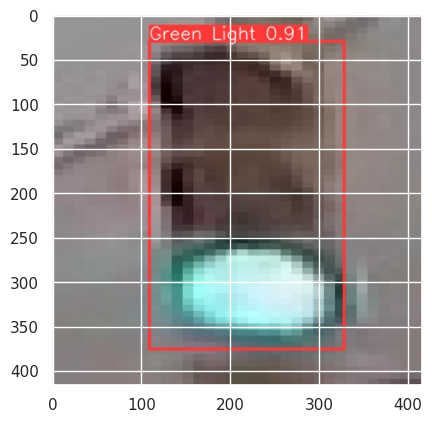

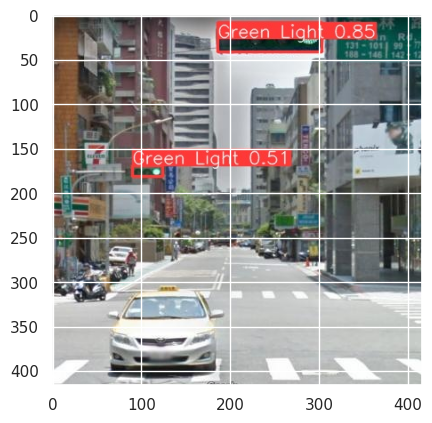

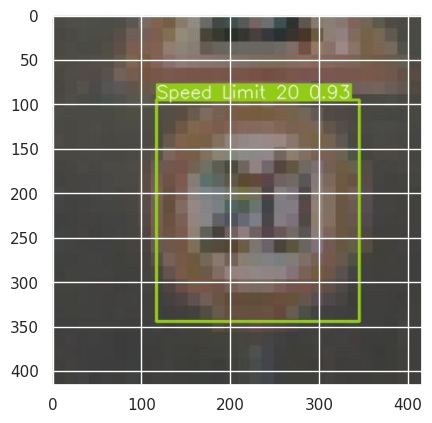

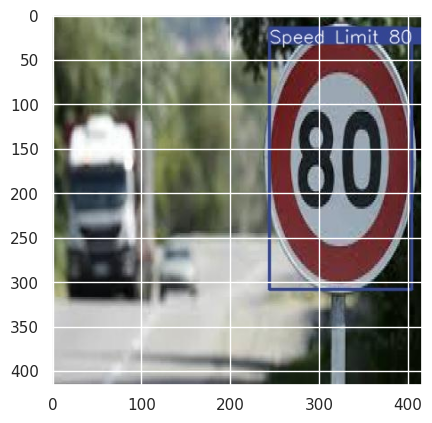

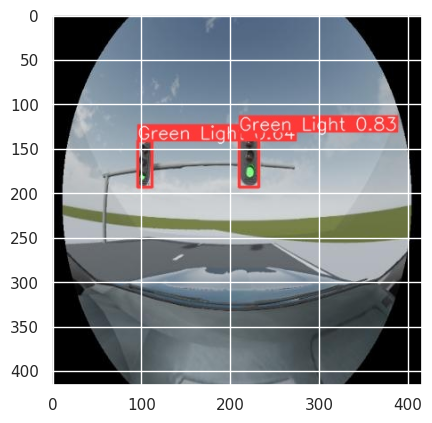

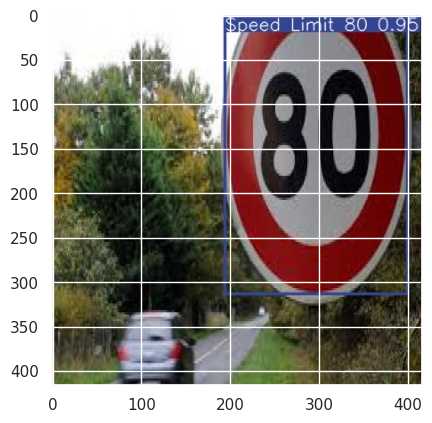

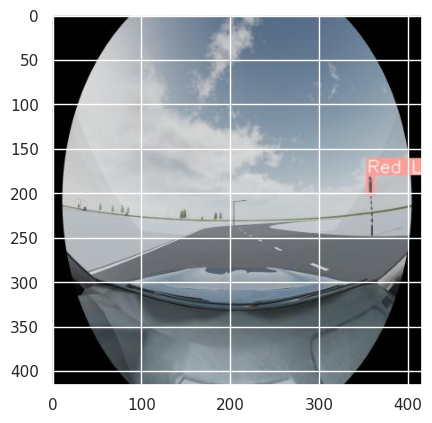

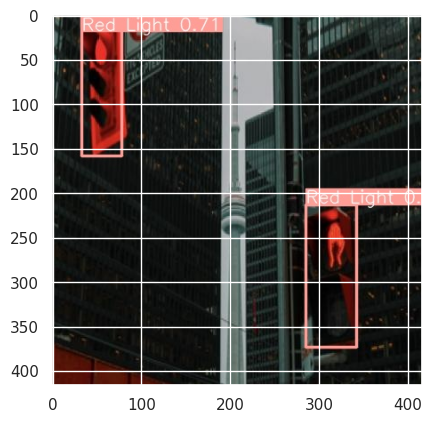

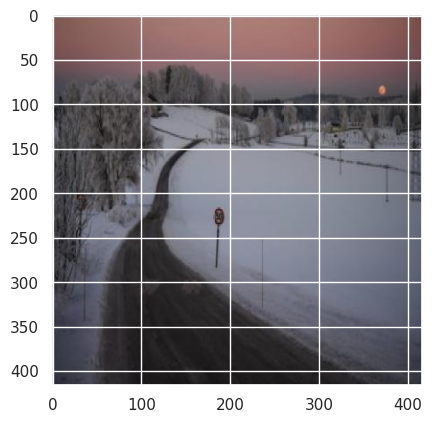

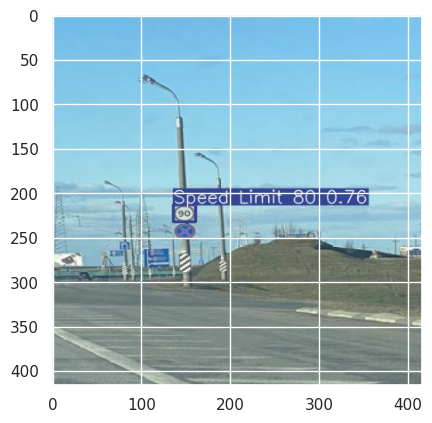

In [20]:
for i in range(2,12):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train2{i}/image0.jpg'))
    plt.show()

## 视频预测

### 原视频

In [29]:
!ffmpeg -y -loglevel panic -i /kaggle/input/traffic/input.mp4 output.mp4

# 原视频展示
Video("output.mp4", width=960)

### 基于预训练模型的视频预测

In [30]:
# 加载预训练模型
video_model = YOLO("yolov8n.pt")

# 检测标志
video_model.predict(source="/kaggle/input/traffic/input.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop sign, 9.8ms
video 1/1 (2/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop sign, 9.6ms
video 1/1 (3/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop sign, 9.4ms
video 1/1 (4/508) /kaggle/input/traffic/input.mp4: 640x640 1 traffic light, 9.8ms
video 1/1 (5/508) /kaggle/input/traffic/input.mp4: 640x640 1 stop 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [31]:
from IPython.display import Video
video_model.export(format='onnx')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.8s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (2.2s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

In [34]:
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict3/input.avi result_out1.mp4

# 展示预训练模型检测结果
Video("result_out1.mp4", width=960)

### 基于训练完毕模型预测

In [25]:
# 加载最佳模型
video_model2 = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

# 检测
video_model2.predict(source="/kaggle/input/traffic/input.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/508) /kaggle/input/traffic/input.mp4: 416x416 1 Stop, 6.5ms
video 1/1 (2/508) /kaggle/input/traffic/input.mp4: 416x416 1 Stop, 6.4ms
video 1/1 (3/508) /kaggle/input/traffic/input.mp4: 416x416 1 Stop, 6.4ms
video 1/1 (4/508) /kaggle/input/traffic/input.mp4: 416x416 (no detections), 5.9ms
video 1/1 (5/508) /kaggle/input/traffic/input.mp4: 416x416 1 Stop, 5.9ms
video 1/

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 

In [26]:
video_model2.export(format='onnx')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 19, 3549) (5.9 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.7s, saved as '/kaggle/working/runs/detect/train2/weights/best.onnx' (11.6 MB)

Export complete (2.1s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train2/weights/best.onnx imgsz=416  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train2/weights/best.onnx imgsz=416 data=/kaggle/input/cardetection/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train2/weights/best.onnx'

In [27]:
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict2/input.avi result_out.mp4

# 展示最佳模型检测结果
Video("result_out.mp4", width=960)